# DH 2018 Machine Reading: Advanced Topics in Word Vectors

## **Welcome to Machine Reading!**

This is a hands-on workshop focusing on various word vectorization methods and applications for digital humanities.
The workshop will be split into 4 sections with 10 minute breaks in-between. The sections get incrementally more advanced, building on concepts and methods from the previous sections.

To follow along, you can run the script portions piecemeal, in order, as we progress through the workshop material.

Instructors:
- Eun Seo Jo, <a href="mailto:eunseo@stanford.edu">*eunseo@stanford.edu*</a>, Stanford University
- Javier de la Rosa, <a href="mailto:versae@stanford.edu">*versae@stanford.edu*</a>, Stanford University
- Scott Bailey, <a href="mailto:scottbailey@stanford.edu">*scottbailey@stanford.edu*</a>, Stanford University


## 1. Understanding Word Vectors with Visualization (50 mins)

This unit will give a brief introduction of word vectors and word embeddings. Concepts needed to understand the internal mechanics of how they work will also be explained, with the help of plots and visualizations that are commonly used when working with them.


- 0:00 - 0:20 From word counts to ML-derived Word Vectors (SVD, PMI, etc.)
- 0:20 - 0:35 Clustering, Vector Math, Vector Space Theory (Euclidean Distance, etc.)
- 0:35 - 0:50 [Activity 1] Visualizations (Clustering, PCA, t-SNE) [We provide vectors]

1. What are the limitations of these word vectors?
2. What are the different use cases between count-based vectors and word2vec? (size of corpus)
3. What are limitations?
4. Why do we use Word2Vec instead?

## 2. Word Vectors via Word2Vec (50 mins)

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings, starting with a conceptual overview of the algorithm itself and ending with an activity to train participants’ own vectors.


- 0:00 - 0:15 Conceptual explanation of Word2Vec
- 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math
- 0:30 - 0:50 [Activity 2] Word2Vec Construction [using Gensim] and Visualization (from part 1) [We provide corpus]


## 3. Pre-trained Models and Extended Vector Algorithms (50 mins)

This unit will explore the various flavors of word embeddings specifically tailored to sentences, word meaning, paragraph, or entire documents. We will give an overview of pre-trained embeddings, including where they can be found and how to use them.

- 0:00 - 0:20 Pre-trained word embeddings (where to find them, which are good, configurations, trained corpus, etc., e.g. https://github.com/facebookresearch/fastText)
- 0:20 - 0:35 Overview of other 2Vecs & other vector engineering: Paragraph2Vec, Sense2Vec, Doc2Vec, etc.
- 0:35 - 0:50 [Activity 3] Choose, download, and use a pre-trained model

## 4. Role of Bias in Word Embeddings (50 mins)

In this unit, we will explore an application and caveat of using word embeddings -- cultural bias. Presenting methods and results from recent articles, we will show how word embeddings can carry the historical biases of the training corpora and lead an activity that shows these human-biases on vectors. We'll also address how such bias can be mitigated.

- 0:00 - 0:10 Algorithmic bias vs human bias 
- 0:10 - 0:40 [Activity 4] Identifying bias in corpora (occupations, gender, ...) [GloVe]
- 0:40 - 0:50 Towards unbiased embeddings; Examine “debiased” embeddings
- 0:50 - 0:60 Conclusion remarks and debate


# 0. Setting Up 

Before we get started, let's go ahead and set up our notebook.

We will start by importing a few Python libraries that we will use throughout the workshop.

## What are these libraries?

1. NumPy: This is a package for scientific computing in python. For us, NumPy is useful for vector operations. 
2. NLTK: Easy to use python package for text processing (lemmatization, tokenization, POS-tagging, etc.)
3. matplotlib: Plotting package for visualization
4. sciKit-learn: Easy to use python package for machine learning algorithms and preprocessing tools
5. gensim: Builtin word2vec and other NLP algorithms

We will be working with a few sample texts using NLTK's corpus package.

In [1]:
%%capture --no-stderr
import sys

!pip install -r requirements.txt
!python -m nltk.downloader all
print("All done!", file=sys.stderr)

All done!


If all went well, we should be able now to import the next packages into our workspace

In [2]:
import numpy as np
import nltk
import sklearn
import matplotlib.pyplot as plt
import gensim

from IPython.display import HTML   #This is just for notebook layout



---



# 1. Understanding Word Vectors with Visualization



## What is a word vector?

A word vector or embedding is a **numerical representation** of a word within a corpus based on co-occurence with other words. Linguists have found that much of the meaning of a word can be derived from looking at its surrounding context. In this unit, we will explore a few major approaches to representing words in a numerical format.

## What is a vector?

Before anything related to words or text let's make sure we're on the same page about vectors! A vector is just a list/array of real numbers. A vector has a size/length which indicates how many numbers are in it. 

In [3]:
# In python you can make a vector using square brackets '[]'.
vector_one = [1,2,3]
vector_two = [1,2,34.53222222]
vector_three = [-2494,3,48.2934,-0.49484]

Here is a list of 5 real numbers (represented as floating point numbers). This vector has 5 dimensions or features.

In [9]:
# Here you can generate a vector of random floats with the random function from numpy
# You'll see that every time you run this command you get a series of different numbers - try it!
# In this instance we're making a vector of length (or size) 5

vector_of_floats = np.random.randn(5)
vector_of_floats

array([ 0.12748909,  0.12702049, -0.34559317,  0.46654733, -0.67907356])

Here is a list of 20 integers between 0 and 3 (exclusive; not including 3). Later we will go into more vector math but you can see that a vector is a multi-dimensional numerical representation.

In [11]:
# You can call a vector of random integers too
# There are three inputs here: the start range of your integer, 
# the end range(exclusive), and the size of the vector
# In our example, the range is [0, 3)

vector_of_ints = np.random.randint(0, 3, size=20)
vector_of_ints

array([0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2])

In [22]:
# Activity: Try making vectors of your own here!
my_vector = np.random.randint(0,99, size=10)
my_vector

array([66, 13, 71,  7,  7,  0, 45, 55, 77, 31])

Word vectors (and vectors in general) can be largely classified into **sparse** and **dense** vectors.

A sparse vector is count-based vector where each element in the vector represent the integer counts of words, usually co-occurence or frequecy. Because a lot of words don't appear all the time, many elements of sparse vectors are 0, to represent 0 observations.

There are a few examples of sparse vectors we will examine here. 

## Document-term matrix

One of the simplest and most common ways of constructing a matrix is recording its occurence through out a set of documents. This creates a document-term matrix where one dimension indicates the frequency of a word in documents and the other indicates the vocabulary (all words that occur at least once in your entire corpus).

Conveniently(!) there are lots of packages out there that help you construct your own matrix with your corpus.

Let's import `scikit-learn`'s `CountVectorizer()`



In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# Imagine you have a document that is just a sentence like this...

documents = [
    "This is a piece of text. This is also some random text. Also text.",
]

Let's now transform this document so that each word is given a unique identifying number.

In [32]:
example_vectorizer = CountVectorizer() #initialize your count vectorizer
example_vectorizer.fit(documents) #documents much be a vector of strings(individual documents)
print("Vocabulary size:", len(example_vectorizer.vocabulary_))
example_vectorizer.vocabulary_  #We can get the unique vocabulary set and its corresponding index here

Vocabulary size: 8


{'this': 7,
 'is': 1,
 'piece': 3,
 'of': 2,
 'text': 6,
 'also': 0,
 'some': 5,
 'random': 4}

Also, we add the corresponding frequency number, which gives the total number of times each word appears in each document.

In [34]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ↑  ↑         ↑\n  doc word_id count")

  (0, 0)	2
  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	3
  (0, 7)	2
   ↑  ↑         ↑
  doc word_id count


Now, let's iterate through all the words that appear in our original document and print all the counts that we generated above.

In [14]:
doc = 0  # first document
for word, word_id in example_vectorizer.vocabulary_.items():
    print(word, ":", counts[doc, word_id])

this : 2
is : 2
piece : 1
of : 1
text : 3
also : 2
some : 1
random : 1


A **document-term matrix** is just a big table (formally, a mathematical matrix) that describes the frequency of words or terms that occur in a collection of documents. In a document-term matrix, **rows correspond to documents** in the collection and **columns correspond to terms**. In 

In our case, since we only have one document, our document-term matrix only has one row (doc `0`) and looks like this.

|             | also | is | of | piece | random | some | text | this |
| ----------- |:----:|:--:|:--:|:-----:|:------:|:----:|:----:|:----:|
| Document #1 |  2   | 2  | 1  | 1     |  1     |  1   |  3   |   2  |

It can easily be extracted by using the `transform()` method our `CountVectorizer()`.

In [35]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[2, 2, 1, 1, 1, 1, 3, 2]])

Each element of the matrix represents vocabulary from above, with the placement corresponding to the unique identifier assigned by scikit-learn, eg. 7th placement (6th, starting from 0) is `text`.

Let's now add a new document that looks almost identical but introduces a new word, just to see how this change reflects on the document-term matrix.

In [36]:
documents = [
    "This is a piece of text. This is also some random text. Also text.",
    "This is a piece of text. This is also some random text. Also new text.",
]
example_vectorizer.fit(documents)
print("Vocabulary size:", len(example_vectorizer.vocabulary_))
example_vectorizer.vocabulary_

Vocabulary size: 9


{'this': 8,
 'is': 1,
 'piece': 4,
 'of': 3,
 'text': 7,
 'also': 0,
 'some': 6,
 'random': 5,
 'new': 2}

In [37]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ↑  ↑         ↑\n  doc word_id count")

  (0, 0)	2
  (0, 1)	2
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	3
  (0, 8)	2
  (1, 0)	2
  (1, 1)	2
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	3
  (1, 8)	2
   ↑  ↑         ↑
  doc word_id count


In [38]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[2, 2, 0, 1, 1, 1, 1, 3, 2],
       [2, 2, 1, 1, 1, 1, 1, 3, 2]])

Now with two documents our matrix looks like this. 

|             | also | is | new | of | piece | random | some | text | this |
| ----------- |:----:|:--:|:---:|:--:|:-----:|:------:|:----:|:----:|:----:|
| Document #1 |  2   | 2  |  0  | 1  | 1     |  1     |  1   |  3   |   2  |
| Document #2 |  2   | 2  |  1  | 1  | 1     |  1     |  1   |  3   |   2  |

Apart from the fact that the vocabulary size is now bigger, just by looking at the document-term matrix we can easily spot that one of our documents has one word more than the other. Certainly, we can spot the difference at column 3 (2 in zero-index Python sequences), which corresponds to the new word introduced, `new`, in our vocabulary. You can see there is also an additional column for the additional document (document 2). You can induce what the matrix would look like with lots more documents and a bigger vocabulary!

By now, you might have noticed that 1-letter words are being ignored. That's due to the way `CountVectorizer()` splits sentences into words. `CountVectorizer()` has options to customize this behaviour and it allows to specify your own regular expression to extract words, disregard stopwords, count ngrams instead of words, cap the max number of words to count, normalize spelling, or count terms within a frequency range. It is worth exploring the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

Here, we have written up a temporary new regular expression that takes into account 1-letter words, so our `CountVectorizer()` can count 'a' as a vocabulary term. As such you can modify the regex to fix you needs.

In [39]:
new_regex = r"(?u)\b\w+\b" #this regex now considers single character tokens
CountVectorizer(token_pattern=new_regex).fit(documents).vocabulary_

{'this': 9,
 'is': 2,
 'a': 0,
 'piece': 5,
 'of': 4,
 'text': 8,
 'also': 1,
 'some': 7,
 'random': 6,
 'new': 3}

In [49]:
#Activity: Make your own corpus of documents and see what kind of doc-term matrix you can generate!

my_corpus = ['wow this is the best workshop ever','this workshop should be given every year','i wonder if other people feel the same']
my_vectorizer = CountVectorizer()
my_vectorizer.fit(my_corpus) 
my_vectorizer.transform(my_corpus).toarray()

array([[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]])

OK, since we have vectorized lots of text humans have generated we will now turn to some canons. 

**Let's now play with three texts/documents in our corpus, taken from literature. ** 

We will use Moby Dick, Emma, and Parents as our example texts in our corpus.
Each text is treated as a document.

In [50]:
from nltk.corpus import gutenberg  

In [51]:
mobydick = gutenberg.raw('melville-moby_dick.txt')
emma = gutenberg.raw('austen-emma.txt')
parents = gutenberg.raw('edgeworth-parents.txt')

In [52]:
corpus = [mobydick, emma, parents]

In [57]:
# We do the same thing as above 
lit_vectorizer = CountVectorizer(token_pattern=new_regex)
lit_vectorizer.fit(corpus)
print("Vocabulary size:", len(lit_vectorizer.vocabulary_))
lit_vectorizer.vocabulary_

Vocabulary size: 21615


{'moby': 12244,
 'dick': 5495,
 'by': 2911,
 'herman': 9143,
 'melville': 11976,
 '1851': 89,
 'etymology': 6802,
 'supplied': 18526,
 'a': 382,
 'late': 10992,
 'consumptive': 4312,
 'usher': 20434,
 'to': 19285,
 'grammar': 8506,
 'school': 16446,
 'the': 19029,
 'pale': 13423,
 'threadbare': 19123,
 'in': 9809,
 'coat': 3755,
 'heart': 9027,
 'body': 2413,
 'and': 1042,
 'brain': 2564,
 'i': 9561,
 'see': 16630,
 'him': 9208,
 'now': 12854,
 'he': 8990,
 'was': 20947,
 'ever': 6831,
 'dusting': 6179,
 'his': 9233,
 'old': 13053,
 'lexicons': 11182,
 'grammars': 8508,
 'with': 21339,
 'queer': 15070,
 'handkerchief': 8823,
 'mockingly': 12251,
 'embellished': 6430,
 'all': 881,
 'gay': 8205,
 'flags': 7548,
 'of': 13012,
 'known': 10846,
 'nations': 12603,
 'world': 21436,
 'loved': 11467,
 'dust': 6178,
 'it': 10501,
 'somehow': 17557,
 'mildly': 12100,
 'reminded': 15582,
 'mortality': 12366,
 'while': 21169,
 'you': 21583,
 'take': 18766,
 'hand': 8815,
 'others': 13201,
 'teach':

To get the ID of a given vocab term:

In [58]:
print("The ID of the word 'piece' is ", str(lit_vectorizer.vocabulary_.get('piece')))

The ID of the word 'piece' is  13982


In [59]:
X = lit_vectorizer.fit_transform(corpus)

This is what the doc-term matrix looks like for our three document corpus.

In [67]:
X = X.toarray()
X #Remember each row corresponds to each document (novel) and each column is each word from our combined vocabulary

array([[20,  2,  4, ...,  0,  2,  1],
       [ 2,  0,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0]], dtype=int64)

The dimensions of the matrix are given by the shape property.

In [68]:
X.shape # How many novels are there?   # How big is our vocabulary?


(3, 21615)

In [64]:
print("The doc-term matrix has {} documents and {} dimensions.".format(str(X.toarray().shape[0]), str(X.toarray().shape[1])))

The doc-term matrix has 3 documents and 21615 dimensions.


In [65]:
# You can look up all the words in the vocab from the three novels
lit_vectorizer.get_feature_names() 

['000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '1414',
 '144',
 '1492',
 '15',
 '150',
 '15o',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775',
 '1776',
 '1778',
 '1779',
 '1788',
 '1791',
 '1793',
 '1795',
 '1799',
 '17oo',
 '17th',
 '18',
 '180',
 '1807',
 '1816',
 '1819',
 '1820',
 '1821',
 '1825',
 '1828',
 '1833',
 '1836',
 '1839',
 '1840',
 '1842',
 '1846',
 '1850',
 '1851',
 '18th',
 '19',
 '1st',
 '2',
 '20',
 '2000',
 '200th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '23rd',
 '24',
 '24th',
 '25',
 '25th',
 '26',
 '26th',
 '27',
 '275th',
 '28',
 '28th',
 '29',
 '299',
 '29th',
 '2nd',
 '3',
 '30',
 '31',
 '31st',
 '32',

Let's get vocab IDs for 'happy', 'sad', 'angry'

In [66]:
print(lit_vectorizer.vocabulary_.get('happy'))
print(lit_vectorizer.vocabulary_.get('sad'))
print(lit_vectorizer.vocabulary_.get('angry'))

8860
16233
1059


In [76]:
X[:,8860], X[:,16233], X[:,1059] 
#This is one way of making word vectors. 
#What kind of information do you think these vectors represent?

(array([  8, 125,  57], dtype=int64),
 array([ 9, 25,  4], dtype=int64),
 array([ 1, 19, 35], dtype=int64))

In [89]:
#In another instance, you could treat each sentence as one document

from nltk import sent_tokenize
sentences = []
for novel in ['melville-moby_dick.txt', 'austen-emma.txt', 'edgeworth-parents.txt']:
    sentences += sent_tokenize(gutenberg.raw(novel))


In [99]:
lit_vectorizer = CountVectorizer(token_pattern=new_regex)
X = lit_vectorizer.fit_transform(sentences).toarray()
X.shape

(27441, 21615)

In [100]:
X #Here you will notice most of these elements are zeros! Why?

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [101]:
X[:,8860], X[:,16233], X[:,1059] 

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [116]:
np.set_printoptions(threshold=np.inf)
print(X[:,8860]) # let's see all the zeros!

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [102]:
print('There are '+str(len(X[:,8860]))+' total elements since there were this many sentneces total')

There are 27441 total elements since there were this many sentneces total


In [111]:
print("... and of these " + str(len(np.where(X[:,8860]>0)[0])) + " have non-zero entries.")
#What does that mean about this word?

... and of these 185 have non-zero entries.


In [113]:
print("In total this word appears " + str(np.sum(X[:,8860])) + " times.")
#What does that say about this word?

In total this word appears 190 times.


Doc-term matrices are used in information retrieval for finding documents that are most relevant to a query. If you look at each row (rather than column) you get a numerical representation of a document by the words that appear in it. 

In [119]:
#Just putting this back normal print options
np.set_printoptions(threshold=10)

## Word-word Matrix

In the previous section we looked at representing words by their relations to a corpus of documents. What about their relation to one another? The most intuitive way of doing this is to build a word-word matrix where now both dimensions are the vocab and each element represents the 

In [159]:
from nltk.tokenize import word_tokenize
import coocc 

In [161]:
a = ['a c b c b c a']

v, m = coocc.ww_matrix(a, word_tokenize, 2)
m.toarray(), v

AttributeError: module 'coocc' has no attribute 'ww_matrix'

In [36]:
WW = X.T * X

Talk about the matrix math; symmetric matrix

In [37]:
WW.toarray()

array([[404,  40,  84, ...,   0,  40,  20],
       [ 40,   4,   8, ...,   0,   4,   2],
       [ 84,   8,  20, ...,   0,   8,   4],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [ 40,   4,   8, ...,   0,   4,   2],
       [ 20,   2,   4, ...,   0,   2,   1]], dtype=int64)

In [38]:
WW.shape

(21615, 21615)

In [39]:
happy_vector = WW[3775,:]
sad_vector = WW[6941,:]
angry_vector = WW[381,:]

In [40]:
angry_vector.toarray()

array([[10,  0, 10, ...,  0,  0,  0]])

PPMI Matrix

**Dense Vectorization**

SVD

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=8)

In [42]:
dense = svd.fit_transform(WW) #n_samples, n_dims

In [43]:
dense.shape

(21615, 8)

In [44]:
happy_vector_dense = dense[3775,:]
sad_vector_dense = dense[6941,:]
angry_vector_dense = dense[381,:]

In [45]:
happy_vector_dense

array([ 6.17428676e+04,  1.41191503e+04, -1.61616505e+03,  5.76041794e-11,
       -7.92371788e-12, -5.54421465e-12, -8.12995032e-12,  2.63880898e-11])

**Vector** **Math**

There are several ways of working with vectors in data science. Since we are working with text data converted into numerial vectors, many of these methods can be applied for text analysis too. Some specific methods tend to perform better for text and these include cosine similarity (over euclidean distance) and k-means (over k-mode or others). 


Cosine Similarity

In [46]:
from sklearn.metrics.pairwise import cosine_similarity as cossim

In [49]:
# So that we can see more contrast when evaluating similarity, let's add in a rather different word: 'biscuit'.
print(lit_vectorizer.vocabulary_.get('biscuit'))
biscuit_vector_dense = dense[2226,:]

2226


In [51]:
happy_vector = happy_vector_dense.reshape(1,-1) #n_samples_X, n_features
sad_vector = sad_vector_dense.reshape(1,-1)
angry_vector = angry_vector_dense.reshape(1,-1)
biscuit_vector = biscuit_vector_dense.reshape(1,-1)

In [52]:
cossim(happy_vector, sad_vector)

array([[0.90384606]])

In [53]:
cossim(angry_vector, sad_vector)

array([[0.99307557]])

In [54]:
cossim(happy_vector, biscuit_vector)

array([[1.]])

Clustering - k-means

Let's work with a small set of words



In [55]:
selection = ['happy','sad','angry','biscuit','bible']

In [57]:
#iterate through all of these words to make a matrix
select_matrix = []
for word in selection:
  word_id = lit_vectorizer.vocabulary_.get(word)
  select_matrix.append(dense[word_id,:])
select_matrix = np.array(select_matrix)
select_matrix

array([[ 2.70676246e+06, -6.69452845e+05, -8.68874489e+04,
         1.94644020e-09, -5.59598554e-10,  1.02761963e-10,
         5.03016318e-10, -8.37499974e-10],
       [ 5.82739322e+05, -8.19008773e+04, -3.81291667e+04,
         3.17497961e-10, -3.89091964e-10,  4.38609509e-11,
         1.13593135e-10, -1.81024632e-10],
       [ 8.01710085e+05, -1.63853195e+05,  4.65752330e+04,
        -2.99955507e-10, -1.66110047e-10,  4.25557943e-10,
         2.18261171e-11, -1.13986247e-10],
       [ 1.85228603e+05,  4.23574508e+04, -4.84849514e+03,
         2.14488862e-10, -2.33790155e-11, -8.61232401e-11,
        -6.32689481e-11,  4.96184747e-11],
       [ 2.56366796e+05,  4.71317164e+04, -1.39482054e+03,
         6.97057802e-11, -5.94750251e-11, -6.11835314e-11,
        -2.58932946e-11,  1.36055935e-10]])

In [58]:
np.array(select_matrix).shape

(5, 8)

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=3)

In [62]:
predictions = kmeans.fit_predict(select_matrix)
predictions

array([1, 0, 0, 2, 2], dtype=int32)

**Visualizations**

t-sne

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #n-components = reduced dimensions

In [64]:
embed = tsne.fit_transform(select_matrix)

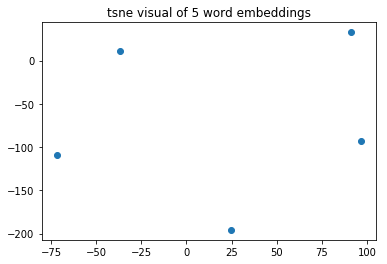

In [65]:
random_x, random_y = zip(*embed)
plt.scatter(random_x,random_y)
plt.title("tsne visual of 5 word embeddings")
plt.show()

Clustering

In [66]:
first_cluster = np.array(embed[np.where(predictions == 0)])
second_cluster = np.array(embed[np.where(predictions == 1)])
third_cluster = np.array(embed[np.where(predictions == 2)])

In [67]:
first_cluster

array([[  96.82745,  -92.75976],
       [  24.85106, -195.75827]], dtype=float32)

In [68]:
second_cluster

array([[91.42209, 32.78118]], dtype=float32)

Text(0.5,1,'k-means clustering of tsne example')

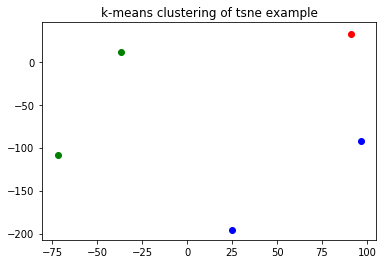

In [69]:
plt.scatter(first_cluster[:,0],first_cluster[:,1], color="blue") #first cluster
plt.scatter(second_cluster[:,0],second_cluster[:,1], color="red") #second cluster
plt.scatter(third_cluster[:,0],third_cluster[:,1], color="green") #second cluster
plt.title("k-means clustering of tsne example")

Now, let's do this with the entire set.

In [70]:
kmeans = KMeans(n_clusters=15)
predictions = kmeans.fit_predict(dense)
tsne = TSNE(n_components=2)

Text(0.5,1,'tsne visual of 5 word embeddings')

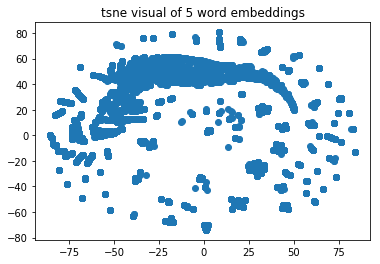

In [71]:
embed = tsne.fit_transform(dense)
random_x, random_y = zip(*embed)
plt.scatter(random_x,random_y)
plt.title("tsne visual of 5 word embeddings")

In [72]:
first_cluster = np.array(embed[np.where(predictions == 0)])
second_cluster = np.array(embed[np.where(predictions == 1)])
third_cluster = np.array(embed[np.where(predictions == 2)])

Text(0.5,1,'k-means clustering of tsne example')

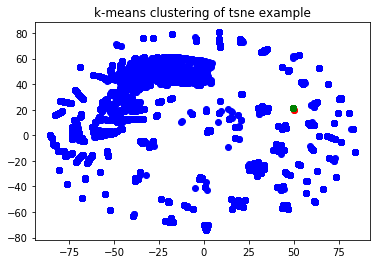

In [73]:
plt.scatter(first_cluster[:,0],first_cluster[:,1], color="blue") #first cluster
plt.scatter(second_cluster[:,0],second_cluster[:,1], color="red") #second cluster
plt.scatter(third_cluster[:,0],third_cluster[:,1], color="green") #second cluster
plt.title("k-means clustering of tsne example")